### An example showing the plot_ks_statistic method used by a scikit-learn classifier

In this example, we'll be plotting a `report` to describe the classifier model performance
using the **breast_cancer**, **iris** or **digits** dataset from scikit-learn.
- `LogisticRegression`
- `RandomForestClassifier`

Here, we'll be using the `scikitplot.deciles.report` method.

In [1]:
from sklearn.datasets import load_breast_cancer as data_2_classes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import numpy as np
np.random.seed(0)
# importing pylab or pyplot
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 5)

# Import scikit-plot
import scikitplot as sp

sp.__version__

'0.4.0.post9'

In [2]:
from scikitplot.decile import kds

In [3]:
kds.report?

Signature:
kds.report(
    y_true,
    y_score,
    *,
    pos_label=None,
    class_index=1,
    feature_infos=True,
    digits=3,
    title_fontsize='large',
    text_fontsize='medium',
    plot_style=None,
    figsize=(10, 5),
    nrows=2,
    ncols=2,
    data=None,
    **kwargs,
)
Docstring:
Generate a decile table and four plots.

- ``Lift`` -> :func:`~scikitplot.kds.plot_lift`
- ``Lift@Decile`` -> :func:`~scikitplot.kds.plot_lift_decile_wise`
- ``Gain`` -> :func:`~scikitplot.kds.plot_cumulative_gain`
- ``KS`` -> :func:`~scikitplot.kds.plot_ks_statistic`

from labels and probabilities.

Parameters
----------
y_true : array-like, shape (n_samples,)
    Ground truth (correct) target values.

y_score : array-like, shape (n_samples, n_classes)
    Prediction probabilities for each class returned by a classifier.

class_index : int, optional, default=1
    Index of the class of interest for multi-class classification. Ignored for
    binary classification.

labels : bool, optional, de

In [4]:
# Load the data
X, y = data_2_classes(return_X_y=True, as_frame=False)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.5, random_state=0
)

In [5]:
# Create an instance of the LogisticRegression
# model = LogisticRegression(max_iter=int(1e5), random_state=0).fit(X_train, y_train)
model = (
    DecisionTreeClassifier(max_depth=1, random_state=0)
    .fit(X_train, y_train)
)

# Perform predictions
y_val_prob = model.predict_proba(X_val)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

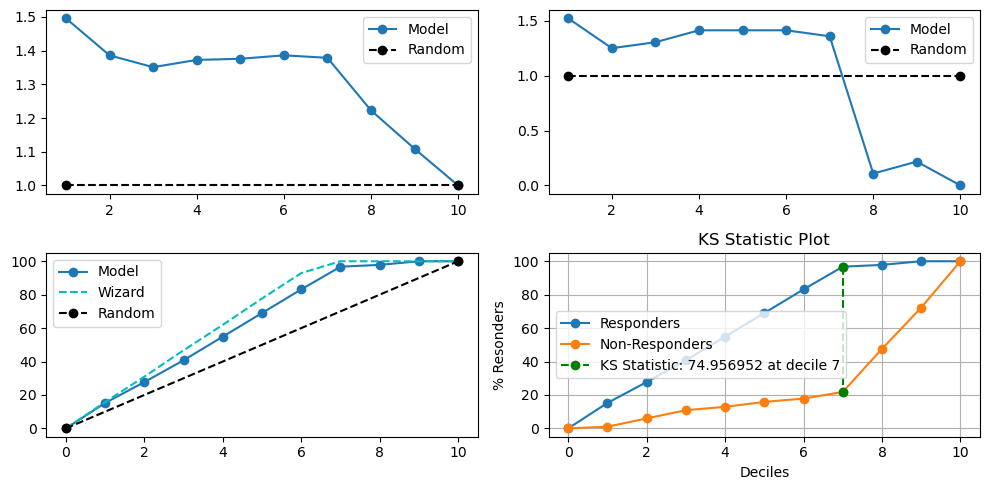

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.923077,0.923077,0.923077,29.0,28.0,1.0,18.4,29,96.551724,29.0,28.0,29,1.0,10.175439,15.217391,15.760870,0.990099,14.227292,1.495502
1,2,0.923077,0.923077,0.923077,28.0,23.0,5.0,18.4,28,82.142857,57.0,51.0,57,6.0,20.000000,27.717391,30.978261,5.940594,21.776797,1.385870
2,3,0.923077,0.923077,0.923077,29.0,24.0,5.0,18.4,29,82.758621,86.0,75.0,86,11.0,30.175439,40.760870,46.739130,10.891089,29.869781,1.350796
3,4,0.923077,0.923077,0.923077,28.0,26.0,2.0,18.4,28,92.857143,114.0,101.0,114,13.0,40.000000,54.891304,61.956522,12.871287,42.020017,1.372283
4,5,0.923077,0.923077,0.923077,29.0,26.0,3.0,18.4,29,89.655172,143.0,127.0,143,16.0,50.175439,69.021739,77.717391,15.841584,53.180155,1.375608
5,6,0.923077,0.923077,0.923077,28.0,26.0,2.0,18.4,28,92.857143,171.0,153.0,171,18.0,60.000000,83.152174,92.934783,17.821782,65.330392,1.385870
6,7,0.049020,0.923077,0.832657,29.0,25.0,4.0,18.4,13,86.206897,200.0,178.0,184,22.0,70.175439,96.739130,100.000000,21.782178,74.956952,1.378533
7,8,0.049020,0.049020,0.049020,28.0,2.0,26.0,18.4,0,7.142857,228.0,180.0,184,48.0,80.000000,97.826087,100.000000,47.524752,50.301335,1.222826
8,9,0.049020,0.049020,0.049020,29.0,4.0,25.0,18.4,0,13.793103,257.0,184.0,184,73.0,90.175439,100.000000,100.000000,72.277228,27.722772,1.108949
9,10,0.049020,0.049020,0.049020,28.0,0.0,28.0,18.4,0,0.000000,285.0,184.0,184,101.0,100.000000,100.000000,100.000000,100.000000,0.000000,1.000000


In [6]:
# Plot!
dt = kds.report(
	y_val,
	y_val_prob[:, 1].ravel(),
)
dt

In [7]:
# !pip install kds

In [8]:
# The magic happens here
# import kds
# kds.metrics.report(
#     y_val, y_val_prob[:, 1].ravel()
# )

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

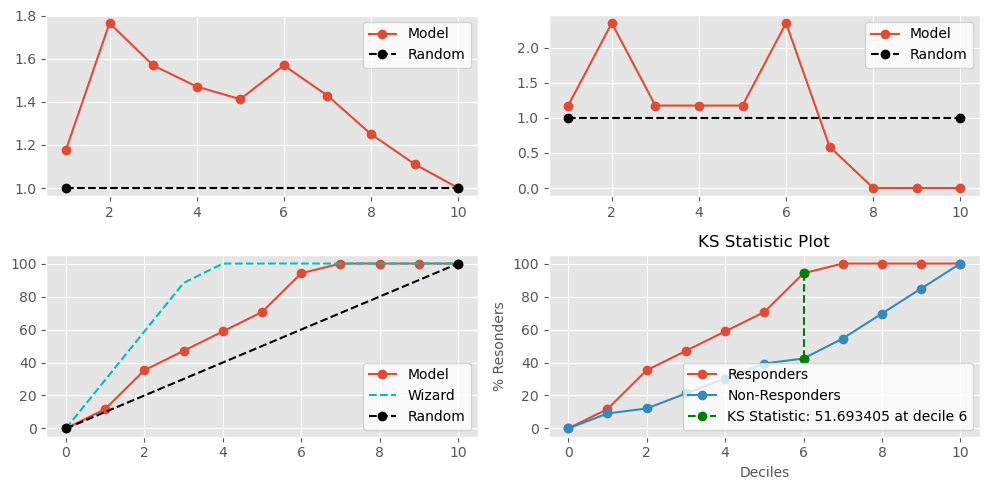

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.485294,0.485294,0.485294,5.0,2.0,3.0,1.7,5,40.0,5.0,2.0,5,3.0,10.0,11.764706,29.411765,9.090909,2.673797,1.176471
1,2,0.485294,0.485294,0.485294,5.0,4.0,1.0,1.7,5,80.0,10.0,6.0,10,4.0,20.0,35.294118,58.823529,12.121212,23.172906,1.764706
2,3,0.485294,0.485294,0.485294,5.0,2.0,3.0,1.7,5,40.0,15.0,8.0,15,7.0,30.0,47.058824,88.235294,21.212121,25.846703,1.568627
3,4,0.485294,0.485294,0.485294,5.0,2.0,3.0,1.7,2,40.0,20.0,10.0,17,10.0,40.0,58.823529,100.000000,30.303030,28.520499,1.470588
4,5,0.485294,0.485294,0.485294,5.0,2.0,3.0,1.7,0,40.0,25.0,12.0,17,13.0,50.0,70.588235,100.000000,39.393939,31.194296,1.411765
5,6,0.485294,0.485294,0.485294,5.0,4.0,1.0,1.7,0,80.0,30.0,16.0,17,14.0,60.0,94.117647,100.000000,42.424242,51.693405,1.568627
6,7,0.000000,0.485294,0.194118,5.0,1.0,4.0,1.7,0,20.0,35.0,17.0,17,18.0,70.0,100.000000,100.000000,54.545455,45.454545,1.428571
7,8,0.000000,0.000000,0.000000,5.0,0.0,5.0,1.7,0,0.0,40.0,17.0,17,23.0,80.0,100.000000,100.000000,69.696970,30.303030,1.250000
8,9,0.000000,0.000000,0.000000,5.0,0.0,5.0,1.7,0,0.0,45.0,17.0,17,28.0,90.0,100.000000,100.000000,84.848485,15.151515,1.111111
9,10,0.000000,0.000000,0.000000,5.0,0.0,5.0,1.7,0,0.0,50.0,17.0,17,33.0,100.0,100.000000,100.000000,100.000000,0.000000,1.000000


In [9]:
# REPRODUCIBLE EXAMPLE
# Load Dataset and train-test split
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.33, random_state=3
)
clf = tree.DecisionTreeClassifier(max_depth=1, random_state=3)
clf = clf.fit(X_train, y_train)
y_prob = clf.predict_proba(X_test)

# The magic happens here
# import kds
# kds.metrics.report(y_test, y_prob[:,1],plot_style='ggplot')
kds.report(
	y_test,
	y_prob[:, 1].ravel(),
	plot_style='ggplot',
)

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

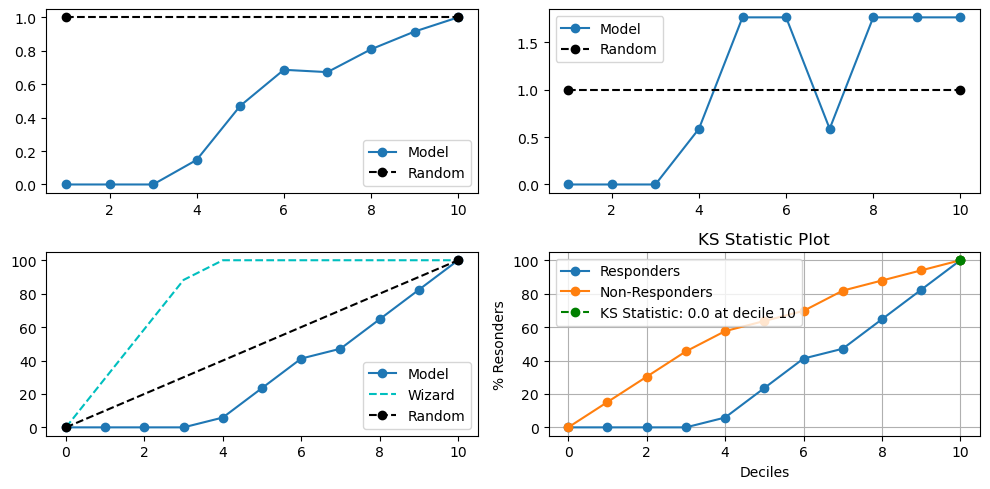

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.5,0.5,0.5,5.0,0.0,5.0,1.7,5,0.0,5.0,0.0,5,5.0,10.0,0.000000,29.411765,15.151515,-15.151515,0.000000
1,2,0.5,0.5,0.5,5.0,0.0,5.0,1.7,5,0.0,10.0,0.0,10,10.0,20.0,0.000000,58.823529,30.303030,-30.303030,0.000000
2,3,0.5,0.5,0.5,5.0,0.0,5.0,1.7,5,0.0,15.0,0.0,15,15.0,30.0,0.000000,88.235294,45.454545,-45.454545,0.000000
3,4,0.0,0.5,0.3,5.0,1.0,4.0,1.7,2,20.0,20.0,1.0,17,19.0,40.0,5.882353,100.000000,57.575758,-51.693405,0.147059
4,5,0.0,0.0,0.0,5.0,3.0,2.0,1.7,0,60.0,25.0,4.0,17,21.0,50.0,23.529412,100.000000,63.636364,-40.106952,0.470588
5,6,0.0,0.0,0.0,5.0,3.0,2.0,1.7,0,60.0,30.0,7.0,17,23.0,60.0,41.176471,100.000000,69.696970,-28.520499,0.686275
6,7,0.0,0.0,0.0,5.0,1.0,4.0,1.7,0,20.0,35.0,8.0,17,27.0,70.0,47.058824,100.000000,81.818182,-34.759358,0.672269
7,8,0.0,0.0,0.0,5.0,3.0,2.0,1.7,0,60.0,40.0,11.0,17,29.0,80.0,64.705882,100.000000,87.878788,-23.172906,0.808824
8,9,0.0,0.0,0.0,5.0,3.0,2.0,1.7,0,60.0,45.0,14.0,17,31.0,90.0,82.352941,100.000000,93.939394,-11.586453,0.915033
9,10,0.0,0.0,0.0,5.0,3.0,2.0,1.7,0,60.0,50.0,17.0,17,33.0,100.0,100.000000,100.000000,100.000000,0.000000,1.000000


In [10]:
# Plot!
dt = kds.report(
	y_test,
	y_prob[:, 0] / 2,
	# figsize=(11, 7)
)
dt